In [1]:
#Importing basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import shap
from sklearn.metrics import accuracy_score

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from numpy import mean
from numpy import std
from numpy import set_printoptions

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

In [2]:
#Importing the Dataset
#Data from old 2019 model training, includes data from 2014 to 2019
afl = pd.read_csv('C:\\Users\\D648007\\AFLdata2.csv')
dataset = afl

In [3]:
#Look at dataset's dimensions: rows and columns
print(dataset.shape)

(1862, 96)


In [4]:
#View first 15 rows to see what the data is like

#Outcome - home game win = 1
dataset.head(15)


,round,home_team,away_team,hm_score,aw_score,score_gap,hm_PWk_lad,aw_PWk_lad,PWk_lad_gap,hm_PWk_perc,...,h_win_2_gap,h_win_3_gap,h_win_4_gap,a_win_1_gap,a_win_2_gap,a_win_3_gap,a_win_4_gap,Interstate,PWk_hm,home_win
0,1,CA,RI,64,97,-33,18.0,1.0,-17.0,59.3,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0,0
1,1,CW,GE,65,72,-7,3.0,8.0,5.0,120.4,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0
2,1,ME,PA,61,87,-26,5.0,10.0,5.0,131.4,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0
3,1,AD,HW,55,87,-32,12.0,4.0,-8.0,104.1,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1,0
4,1,WB,SY,82,65,17,13.0,6.0,-7.0,77.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1
5,1,BL,WC,102,58,44,15.0,2.0,-13.0,89.1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,1
6,1,SK,GC,85,84,1,16.0,17.0,1.0,75.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1
7,1,GW,ES,112,40,72,7.0,11.0,4.0,114.3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,1
8,1,FR,NM,141,59,82,14.0,9.0,-5.0,76.2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,1
9,2,RI,CW,66,110,-44,5.0,11.0,6.0,151.6,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0


In [5]:
dataset.dtypes

round            int64
home_team       object
away_team       object
hm_score         int64
aw_score         int64
                ...   
a_win_3_gap    float64
a_win_4_gap    float64
Interstate     float64
PWk_hm           int64
home_win         int64
Length: 96, dtype: object

In [6]:
#Get basic descriptive stats of the dataset to understand mean, median, standard dev, range
dataset.describe()

,round,hm_score,aw_score,score_gap,hm_PWk_lad,aw_PWk_lad,PWk_lad_gap,hm_PWk_perc,aw_PWk_perc,PWk_perc_gap,...,h_win_2_gap,h_win_3_gap,h_win_4_gap,a_win_1_gap,a_win_2_gap,a_win_3_gap,a_win_4_gap,Interstate,PWk_hm,home_win
count,1862.000000,1862.000000,1862.000000,1862.000000,1861.000000,1841.000000,1841.000000,1861.000000,1841.000000,1841.000000,...,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1862.000000,1862.000000
mean,11.994092,86.382922,80.276047,6.106874,9.522300,9.273221,-0.255296,102.644868,104.182835,-1.574796,...,0.169022,0.112500,0.075000,0.276630,0.199457,0.134783,0.079348,0.714674,0.281418,0.529538
std,6.631910,34.039093,32.780695,44.298216,5.168366,5.212525,7.209143,29.573266,30.487561,40.552021,...,0.374873,0.316067,0.263463,0.447454,0.399700,0.341584,0.270354,0.451692,0.449812,0.499261
min,1.000000,0.000000,0.000000,-138.000000,0.000000,0.000000,-17.000000,0.000000,0.000000,-223.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,68.000000,62.000000,-22.000000,5.000000,5.000000,-5.000000,82.000000,83.200000,-27.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,87.000000,81.000000,3.000000,10.000000,9.000000,-1.000000,102.900000,104.200000,-1.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,18.000000,107.750000,100.000000,34.000000,14.000000,14.000000,5.000000,120.400000,121.900000,25.300000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,23.000000,233.000000,187.000000,186.000000,18.000000,18.000000,17.000000,270.300000,280.000000,174.600000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#To understand class distribution - i.e. how many in the sample get a home win vs dont
#This is a 'classification' prediction exercise, we want to classify teams into two groups - will/won't win at home 
class_counts = dataset.groupby('home_win').size()
print(class_counts)

home_win
0    876
1    986
dtype: int64


In [8]:
#Identify which columns have NaN (Not a Number - i.e. missing values)
nan_values = dataset.isna()
nan_columns = nan_values.any()

columns_with_nan = dataset.columns[nan_columns].tolist()
print(columns_with_nan)

#Need to remove the NaN

['hm_PWk_lad', 'aw_PWk_lad', 'PWk_lad_gap', 'hm_PWk_perc', 'aw_PWk_perc', 'PWk_perc_gap', 'hm_PWk_pts', 'aw_PWk_pts', 'PWk_pts_gap', 'hm_PWk_pts_stan', 'aw_PWk_pts_stan', 'PWk_pts_gap_stan', 'aw_PY', 'aw_PY_perc', 'aw_2PY', 'aw_2PY_perc', 'aw_3PY', 'aw_3PY_perc', 'aw_4PY', 'aw_4PY_perc', 'aw_PY_2PY', 'aw_PY_3PY', 'aw_PY_4PY', 'aw_Pypc_2Pypc', 'aw_Pypc_3Pypc', 'aw_Pypc_4Pypc', 'PY_gap', 'PY_%_gap', '2PY_gap', '2PY_%_gap', '3PY_gap', '3PY_%_gap', '4PY_gap', '4PY_%_gap', 'aw_Dr_PY', 'aw_Dr_2PY', 'aw_Dr_3py', 'aw_Dr_4py', 'aw_Dr_Tot', 'Dr_PY_gap', 'Dr_2PY_gap', 'Dr_3PY_gap', 'Dr_4PY_gap', 'Dr_Tot_gap', 'aw_Pwk_win', 'aw_2Pwk_win', 'aw_3Pwk_win', 'aw_4Pwk_win', 'aw_win_1', 'aw_win_2', 'aw_win_3', 'aw_win_4', 'h_win_1_gap', 'h_win_2_gap', 'h_win_3_gap', 'h_win_4_gap', 'a_win_1_gap', 'a_win_2_gap', 'a_win_3_gap', 'a_win_4_gap', 'Interstate']


In [9]:
# Get names of indexes for which column hm_score has value 0
indexNames = dataset[ dataset['hm_score'] == 0 ].index

In [10]:
# Delete these row indexes from dataFrame
dataset.drop(indexNames , inplace=True)

In [11]:
#Look at dataset's dimensions: rows and columns
print(dataset.shape)

(1762, 96)


In [12]:
#Check whether all NaNs have been removed
#Identify which columns have NaN (Not a Number - i.e. missing values)
nan_values = dataset.isna()
nan_columns = nan_values.any()

columns_with_nan = dataset.columns[nan_columns].tolist()
print(columns_with_nan)


[]


In [13]:
#To understand class distribution - i.e. how many in the sample are a home win vs loss

class_counts = dataset.groupby('home_win').size()
print(class_counts)

home_win
0    776
1    986
dtype: int64


In [14]:
#Remove columns that won't be used for training
dataset.drop(['home_team', 'away_team', 'hm_score', 'aw_score', 'score_gap'], axis=1, inplace=True )

In [15]:
dataset.head(2)

,round,hm_PWk_lad,aw_PWk_lad,PWk_lad_gap,hm_PWk_perc,aw_PWk_perc,PWk_perc_gap,hm_PWk_pts,aw_PWk_pts,PWk_pts_gap,...,h_win_2_gap,h_win_3_gap,h_win_4_gap,a_win_1_gap,a_win_2_gap,a_win_3_gap,a_win_4_gap,Interstate,PWk_hm,home_win
0,1,18.0,1.0,-17.0,59.3,136.1,-76.8,8.0,72.0,64.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0,0
1,1,3.0,8.0,5.0,120.4,131.6,-11.2,60.0,52.0,-8.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0


In [16]:
#Print list of column names in training set

for col in dataset.columns:
    print(col)

round
hm_PWk_lad
aw_PWk_lad
PWk_lad_gap
hm_PWk_perc
aw_PWk_perc
PWk_perc_gap
hm_PWk_pts
aw_PWk_pts
PWk_pts_gap
hm_PWk_pts_stan
aw_PWk_pts_stan
PWk_pts_gap_stan
hm_PY
hm_PY_perc
hm_2PY
hm_2PY_perc
hm_3PY
hm_3PY_perc
hm_4PY
hm_4PY_perc
hm_PY_2PY
hm_PY_3PY
hm_PY_4PY
hm_Pypc_2Pypc
hm_Pypc_3Pypc
hm_Pypc_4Pypc
aw_PY
aw_PY_perc
aw_2PY
aw_2PY_perc
aw_3PY
aw_3PY_perc
aw_4PY
aw_4PY_perc
aw_PY_2PY
aw_PY_3PY
aw_PY_4PY
aw_Pypc_2Pypc
aw_Pypc_3Pypc
aw_Pypc_4Pypc
PY_gap
PY_%_gap
2PY_gap
2PY_%_gap
3PY_gap
3PY_%_gap
4PY_gap
4PY_%_gap
hm_Dr_PY
hm_Dr_2PY
hm_Dr_3py
hm_Dr_4py
hm_Dr_Tot
aw_Dr_PY
aw_Dr_2PY
aw_Dr_3py
aw_Dr_4py
aw_Dr_Tot
Dr_PY_gap
Dr_2PY_gap
Dr_3PY_gap
Dr_4PY_gap
Dr_Tot_gap
hm_Pwk_win
hm_2Pwk_win
hm_3Pwk_win
hm_4Pwk_win
aw_Pwk_win
aw_2Pwk_win
aw_3Pwk_win
aw_4Pwk_win
hm_win_1
hm_win_2
hm_win_3
hm_win_4
aw_win_1
aw_win_2
aw_win_3
aw_win_4
h_win_1_gap
h_win_2_gap
h_win_3_gap
h_win_4_gap
a_win_1_gap
a_win_2_gap
a_win_3_gap
a_win_4_gap
Interstate
PWk_hm
home_win


In [17]:
#Find column index number for outcome value home_win
dataset.columns.get_loc("home_win")

90

In [18]:
#Before splitting into an array for model fitting, save the feature names for later use
feature_names = list(dataset.columns)


In [19]:
#remove the label name 'home_win'
del feature_names[90]

In [ ]:
print(feature_names)

In [20]:
#Create models using all features, to determine feature importance
#Separate the dataset into dependent (x) and independent (y, has diabetes) components, starting with converting to array
array = dataset.values

X = array[:, :90]
Y = array[:, 90]


In [21]:
Y = [1 if x == 1 else 0 for x in Y]

In [ ]:
# Feature Extraction with RFE

# feature extraction
model = LogisticRegression(solver = 'lbfgs', C=0.01, penalty='l2', max_iter=3000)
#model = RandomForestClassifier(n_estimators=1000, max_features='log2', max_depth= 5)
rfe = RFE(model, 20)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

In [ ]:
#Check feature ranking
feature_ranking = list(fit.ranking_)

In [ ]:
#Add feature names to feature rankings

named_rankings = list(zip(feature_names, feature_ranking))

named_rankings = pd.DataFrame(named_rankings)#.to_csv('rankingslogr.csv')

In [ ]:
named_rankings.head(5)

In [ ]:
named_rankings.columns = ['feature', 'rank',]


In [ ]:
named_rankings.head(5)

In [ ]:
lr_featselect = named_rankings[named_rankings['rank'] < 2]

In [ ]:
print(lr_featselect.shape)

In [ ]:
lr_featselect = lr_featselect['feature']


In [ ]:
print(lr_featselect)

In [ ]:
array = rf_featselect.values

feats = array[:, :1]
rank = array[:, 1]

In [ ]:
print(feats)

Optimal number of features : 11


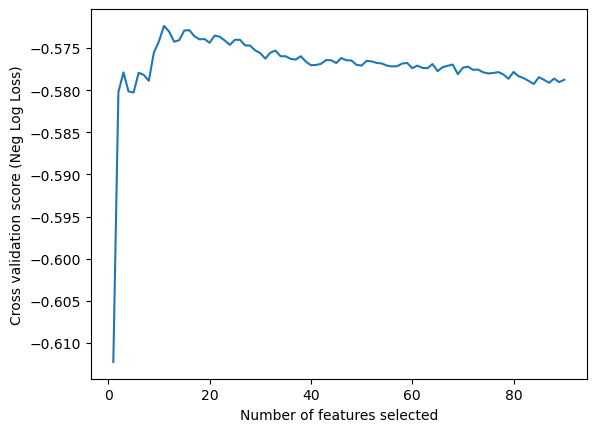

In [22]:
#Feature Selection with RFECV

estimator = RandomForestClassifier(n_estimators=1500, max_features='log2', max_depth= 5)
min_features_to_select = 1
selector = RFECV(estimator, step=1, cv=10, scoring = 'neg_log_loss', min_features_to_select=min_features_to_select)
selection = selector.fit(X, Y)


print("Optimal number of features : %d" % selection.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (Neg Log Loss)")
plt.plot(
    range(min_features_to_select, len(selection.grid_scores_) + min_features_to_select),
    selection.grid_scores_,
)
plt.show()

In [23]:
selection.ranking_

array([21,  7,  8,  1,  1,  1,  1, 29, 40,  1,  3, 10,  1,  9,  1, 54, 33,
       50, 23, 38, 26, 35, 48, 47, 13, 12, 15, 14,  1, 28,  4, 58, 34, 57,
       30, 53, 43, 51, 19, 18, 32,  1,  1, 22,  2, 16,  1, 17,  5, 31, 41,
       45, 49, 37,  6, 46, 42, 52, 11, 27, 39, 20, 25, 24, 73, 60, 56, 36,
       65, 59, 55, 44, 72, 68, 75, 79, 71, 74, 67, 69, 62, 64, 78, 80, 70,
       66, 76, 61, 63, 77])

In [24]:
feature_ranking = list(selection.ranking_)

In [25]:
#Add feature names to feature rankings for RFECV with RF

named_rankings = list(zip(feature_names, feature_ranking))

named_rankings = pd.DataFrame(named_rankings).to_csv('rankingsrfecvnegll.csv')

In [ ]:
named_rankings.columns = ['feature', 'rank',]
lr_featselect = named_rankings[named_rankings['rank'] < 2]
lr_featselect = list(lr_featselect['feature'])
lr_featselect

In [ ]:
#Split into training and test data
# We train the model on the training data and then test how good it is using the unseen test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=42)

In [ ]:
print(X.shape)

In [ ]:
print(Y)

In [ ]:
#Fit model #1 Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'lbfgs', C=0.01, penalty='l2', max_iter=1000)
lr.fit(X_train, Y_train)

In [ ]:
#Check decision tree model training accuracy using training dataset
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_train, lr.predict(X_train)))

In [ ]:
#Check decision Tree model test accuracy using test dataset
resultlr = lr.score(X_test, Y_test)
print("Test Set Accuracy of Logistic Regression model: %.3f%%" % (resultlr*100.0))

In [ ]:
#Score the Test dataset with the model
lrtest_proba = lr.predict_proba(X_test)
print(lrtest_proba)

In [ ]:
print(Y_test)

In [ ]:
#Plot confusion matrix to see what proportion of wins are predicted correctly
from sklearn.metrics import plot_confusion_matrix
matrixlr = plot_confusion_matrix(lr, X_test, Y_test, cmap=plt.cm.Blues)
plt.show(matrixlr)

In [ ]:
# get importance
importance = lr.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
#Fit model #2 Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
ld = LinearDiscriminantAnalysis(shrinkage= 0.1, solver='lsqr')
ld.fit(X_train, Y_train)

In [ ]:
#Check LDA model training accuracy using training dataset

print(accuracy_score(Y_train, ld.predict(X_train)))

In [ ]:
#Test LDA model accuracy using test dataset
resultld = ld.score(X_test, Y_test)
print("Test Set Accuracy of LDA model: %.3f%%" % (resultld*100.0))

In [ ]:
#Plot LDA confusion matrix to see what proportion of games are predicted correctly
matrixld = plot_confusion_matrix(ld, X_test, Y_test, cmap=plt.cm.Blues)
plt.show(matrixld)

In [ ]:
#####################
##RANDOM FOREST######
#####################

In [ ]:
#Fit model #3 Random Forest
# Random Forest creates a lot of trees and then slects the most frequent class as the winning prediction.
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000, max_features='log2', max_depth= 5)
rf.fit(X_train, Y_train)

In [ ]:
#Number of features seen during fit
print(rf.n_features_in_)

In [ ]:
#Check feature importance
feature_importance = list(rf.feature_importances_)

In [ ]:
print(feature_importance)

In [ ]:
#Join feature names to feature importance scores
named_importance = list(zip(feature_names, feature_importance))

named_importance = pd.DataFrame(named_importance).to_csv('importancerf.csv')


In [ ]:
#Assess Random Forest training accuracy

print(accuracy_score(Y_train, rf.predict(X_train)))

In [ ]:
#Test Random Forest model accuracy using test dataset
resultrf = rf.score(X_test, Y_test)
print("Test Set Accuracy of Random Forest model: %.3f%%" % (resultrf*100.0))

In [ ]:
#Plot Random Forest confusion matrix 
matrixrf = plot_confusion_matrix(rf, X_test, Y_test, cmap=plt.cm.Blues)
plt.show(matrixrf)

In [ ]:
##Error Analysis

In [ ]:
from raiwidgets import ResponsibleAIDashboard
from responsibleai import RAIInsights

In [ ]:
target_feature='home_win'

In [ ]:
rai_insights = RAIInsights(rf, X_train, X_test, target_feature, 'classification', categorical_features=[])

In [ ]:
# Add in Error Analysis
rai_insights.error_analysis.add()

In [ ]:
rai_insights.compute()

In [ ]:
#To view the error analysis dashboard
ResponsibleAIDashboard(rai_insights)

In [ ]:
#SHAP Values
# Fits the explainer onto the x-test data that it is predicting for 
explainer = shap.Explainer(rf.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

In [ ]:
# Evaluate SHAP values at a model level
shap_values = explainer(X)

In [ ]:
#Violin plot of SHAP at a model level
#Red is high, blue is low
shap.summary_plot(shap_values, plot_type='violin')

In [ ]:
shap.plots.bar(shap_values)

In [ ]:
#Shap values at an individual prediction level
#for observation [0]
shap.plots.bar(shap_values[300])

In [ ]:
#SHAP values at an individual prediction level
#Waterfall, showing contributors of gap between prediction and expected (expected = mean of all predictions)
#For observation [0]
shap.plots.waterfall(shap_values[19])

In [ ]:
#Import data for scoring
scoring = pd.read_csv('C:\\Users\\D648007\\AFL2022ScoringData.csv')


In [ ]:
#Create scoring dataset of features identified through feature importance testing
scoring = scoring[["round", "hm_PWk_lad", "aw_PWk_lad", "PWk_lad_gap", "hm_PWk_perc", "aw_PWk_perc" , "PWk_perc_gap", "hm_PWk_pts", 
                  "aw_PWk_pts", "PWk_pts_gap", "hm_PWk_pts_stan", "aw_PWk_pts_stan", "PWk_pts_gap_stan", "hm_PY" , "hm_PY_perc",
                  "aw_PY", "aw_PY_perc", "PY_gap", "PY_%_gap", "2PY_%_gap", "3PY_%_gap"]]

In [ ]:
#Separate the required columns into an array file for scoring by the model
array = scoring.values

score = array[:, :]

In [ ]:
print(score.shape)

In [ ]:
#Before splitting into an array for model fitting, save the feature names for later use
rnd = score[:, 0]

In [ ]:
#SHAP Values
# Fits the explainer onto the x-test data that it is predicting for 
explainer = shap.Explainer(rf.predict_proba, score)
# Calculates the SHAP values - It takes some time
shap_values = explainer(score)

In [ ]:
#Shap values at an individual prediction level
#for observation [0]
shap.plots.bar(shap_values[7])

In [ ]:
#SHAP values at an individual prediction level
#Waterfall, showing contributors of gap between prediction and expected (expected = mean of all predictions)
#For observation [0]
shap.plots.waterfall(shap_values[7])

In [ ]:
rfproba = rf.predict_proba(score)
print(rfproba)

In [ ]:
#Score the 3 Test datasets with the model
lrtest_proba = lr.predict_proba(X_test)
ldtest_proba = ld.predict_proba(X_test)
rftest_proba = rf.predict_proba(X_test)


In [ ]:
print(lrtest_proba)

In [ ]:

testx2_proba = np.append(lrtest_proba, ldtest_proba, axis=1)
testx3_proba = np.append(testx2_proba, rftest_proba, axis=1)
print(testx3_proba)

In [ ]:
print(testx3_proba)

In [ ]:
testx3 = pd. DataFrame(testx3_proba, columns=['LR0', 'LR1', 'LD0', 'LD1', 'RF0', 'RF1'])

In [ ]:
testx3["Y Test"] = Y_test
testx3.head(5)

In [ ]:
##To export as a csv, 

testx3.to_csv('testx3a.csv')

In [ ]:
#Set parameters for Random Forest grid search
param_grid = {
    "max_depth": [2, 3, 4, 5, 7],
    "n_estimators": [1, 10, 100, 1000]
    "max_features": ['sqrt', 'log2'],
    }


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

# define models and parameters
model = RandomForestClassifier()
n_estimators = [1, 10, 100, 1000]
max_features = ['sqrt', 'log2']
max_depth = [2, 3, 4, 5, 7]
# define grid search
grid = dict(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='neg_log_loss',error_score=0)
grid_result = grid_search.fit(X_train, Y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
#################
##XG BOOST##
#################

In [ ]:
#Fit model #4 XGBoost
import xgboost
print(xgboost.__version__)
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, Y_train)

In [ ]:
#Check XGB model training accuracy using training dataset
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_train, xgb.predict(X_train)))

In [ ]:
#Test XGB model accuracy using test dataset
resultxgb = xgb.score(X_test, Y_test)
print("Test Set Accuracy of XGB model: %.3f%%" % (resultxgb*100.0))

In [ ]:
#Set param grid for gridsearch

param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

In [ ]:
from sklearn.model_selection import GridSearchCV

xgb_cl = XGBClassifier(objective="binary:logistic")

xgb_grid = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="accuracy")
xgb_grid.fit(X_train, Y_train)

In [ ]:
xgb_grid.best_score_

In [ ]:
#Test XGB grid search model accuracy using test dataset
resultxgb_grid = xgb_grid.score(X_test, Y_test)
print("Test Set Accuracy of XGB_grid model: %.3f%%" % (resultxgb_grid*100.0))

In [ ]:
##To export as a csv, where prediction is the array file with scores
import numpy as np
import pandas as pd
prediction = pd.DataFrame(dtsvmrf_proba).to_csv('prediction5.csv')

In [ ]:
# Train Random Forest model using Repeated Cross Validation
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

rcv = RepeatedKFold(n_splits=10, n_repeats=3, random_state = 5)
model = RandomForestClassifier()
results = cross_val_score(model, X_train, Y_train, cv=rcv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(results), std(results)))